In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [3]:
!pip install -q kaggle

In [18]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': username and key

In [21]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [22]:
!kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format

100% 185M/185M [00:02<00:00, 89.6MB/s]



In [27]:
!unzip \*.zip  && rm *.zip

Archive:  az-handwritten-alphabets-in-csv-format.zip
  inflating: A_Z Handwritten Data.csv  
  inflating: A_Z Handwritten Data/A_Z Handwritten Data.csv  


In [29]:
handwritten_data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')

In [32]:
X = handwritten_data.drop('0',axis = 1)
y = handwritten_data['0']

In [36]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.15)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

In [37]:
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (316582, 28, 28)
Test data shape:  (55868, 28, 28)


In [38]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

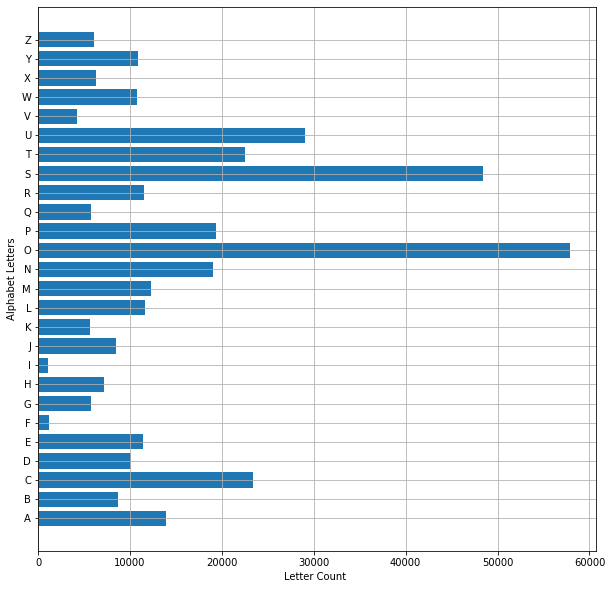

In [40]:
train_yint = np.int0(y)
count = np.zeros(26, dtype='int')
for i in train_yint:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Letter Count ")
plt.ylabel("Alphabet Letters")
plt.grid()
plt.show()


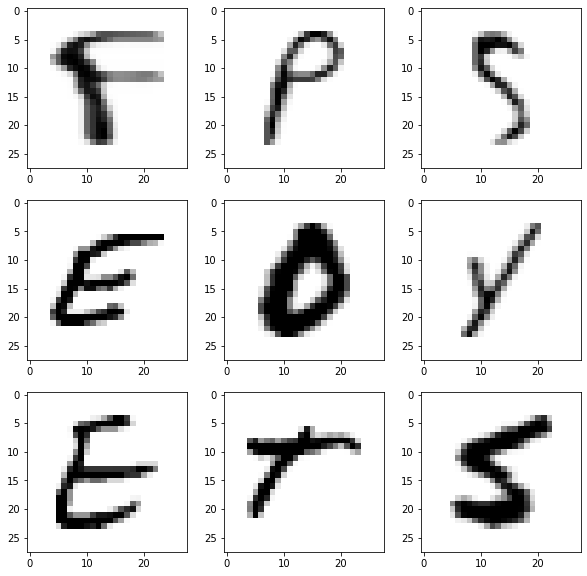

In [43]:
shuffled = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuffled[i], (28,28)), cmap="Greys")
plt.show()

In [44]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("Reshaped train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("Reshaed test data: ", test_X.shape)



Reshaped train data:  (316582, 28, 28, 1)
Reshaed test data:  (55868, 28, 28, 1)


In [46]:
train_y = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_y.shape)

test_y = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_y.shape)

New shape of train labels:  (316582, 26)
New shape of test labels:  (55868, 26)


In [47]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

In [48]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=1)

In [49]:
history = model.fit(train_X, train_y, epochs=4, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,test_y))

Epoch 1/4
9894/9894 [==============================] - 405s 41ms/step - loss: 0.3842 - accuracy: 0.9166 - val_loss: 0.1146 - val_accuracy: 0.9702
Epoch 2/4
9894/9894 [==============================] - 393s 40ms/step - loss: 0.0776 - accuracy: 0.9783 - val_loss: 0.0827 - val_accuracy: 0.9772
Epoch 3/4
9894/9894 [==============================] - 381s 39ms/step - loss: 0.0628 - accuracy: 0.9825 - val_loss: 0.0728 - val_accuracy: 0.9809
Epoch 4/4
9894/9894 [==============================] - 387s 39ms/step - loss: 0.0550 - accuracy: 0.9848 - val_loss: 0.0577 - val_accuracy: 0.9845


In [50]:
model.summary()
model.save('handwritten_alpha.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [51]:
print("Validation Accuracy:", history.history['val_accuracy'])
print("Training Accuracy:", history.history['accuracy'])

Validation Accuracy: [0.9702154994010925, 0.9771962761878967, 0.9809193015098572, 0.9845170974731445]
Training Accuracy: [0.9573980569839478, 0.97916179895401, 0.9829017519950867, 0.9844526648521423]


In [58]:
prediction = model.predict(test_X[:9])
print(test_X.shape)

(55868, 28, 28, 1)


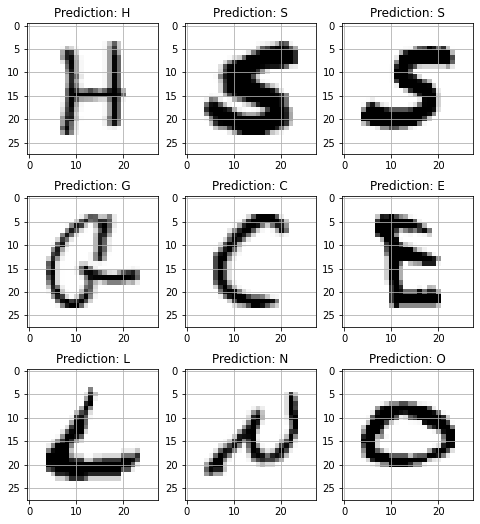

In [59]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    prediction = word_dict[np.argmax(test_y[i])]
    ax.set_title("Prediction: "+prediction)
    ax.grid()
